# Analyze A/B Test Results

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#probability">Part I - Probability</a></li>
<li><a href="#ab_test">Part II - A/B Test</a></li>
<li><a href="#regression">Part III - Regression</a></li>
</ul>

<a id='intro'></a>
## Introduction

A / B tests are very commonly performed by data analysts and data scientists.

In this project, I will be working to understand the results of an A / B test run by an e-commerce website. The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
### Part I - Probability

In [57]:
# import numpy, pandas and matplotlib
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`Import the required packages`

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [20]:
# load the Dataset
df = pd.read_csv('ab_data.csv')

# view first 5 rows of the Dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [196]:
# view the number of rows of the Dataset
df['user_id'].count()

294478

`There are 294478 rows.`

c. The number of unique users in the dataset.

In [22]:
# view nunique in the Dataset
df['user_id'].nunique()

290584

`There are 290584 unique values in user_id column.`

d. The proportion of users converted.

In [23]:
# The proportion
df['converted'].mean()

0.11965919355605512

`The proportion is 0.119 about 12%.`

e. The number of times the `new_page` and `treatment` don't line up.

In [199]:
# view the number of times the new_page and treatment don't match
df.query('landing_page == "new_page" and group != "treatment" or landing_page != "new_page" and group == "treatment"')['user_id'].count()

3893

`The number of times the new_page and treatment don't match is 3893.`

f. Do any of the rows have missing values?

In [25]:
# view missing value in the Dataset
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`There are not  missing values.`

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [26]:
df2 = df.query('group == "treatment" and landing_page == "new_page" or group == "control" and landing_page == "old_page"')

# confirm changes
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [27]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`All rows in DataFrame are validated.`

`3.` Use **df2** and the cells below.

a. How many unique **user_id**s are in **df2**?

In [28]:
# view nunique in the Dataset
df2['user_id'].nunique()

290584

`There are 290584 unique values in user_id column.`

b. There is one **user_id** repeated in **df2**.  What is it?

In [32]:
# view number of duplicates in the Dataset
df2['user_id'].duplicated().sum()

1

`There is one duplicated value in user_id column.`

In [33]:
# view the repeated value in the Dataset
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`The duplicated value in user_id column is 773192.`

c. What is the row information for the repeat **user_id**? 

In [34]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`The user_id for the non-unique id in df2 773192.`

`The landing_page for the non-unique id new_page.`

`The group for the non-unique id treatment.`

`The value of converted column for the non-unique id 0.`

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [35]:
# Drop the second user id 
df2.drop([2893], inplace=True)

# confirm changes
df2.query('user_id == 773192')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`Now, there is only one user has 773192 id.`

`4.` Use **df2** in the below cells.

a. What is the probability of an individual converting regardless of the page they receive?

In [37]:
# The proportion regardless of the page they receive
df2['converted'].mean()

0.11959708724499628

`The Probability of converting regardless of page is 0.119 about 12%.`

b. Given that an individual was in the `control` group, what is the probability they converted?

In [122]:
# The proportion
prop_cont_conv = df2.query('group == "control"')['converted'].mean()

# confirm changes
prop_cont_conv

0.1203863045004612

`Given that an individual was in the control group, the probability of converting is 0.120 about 12%.`

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [123]:
# The proportion
prop_trea_conv = df2.query('group == "treatment"')['converted'].mean()

# confirm changes
prop_trea_conv

0.11880806551510564

`Given that an individual was in the treatment group, the probability of converting is 0.118 about 12%.`

d. What is the probability that an individual received the new page?

In [201]:
# The proportion
df2.query('landing_page == "new_page"')['user_id'].count() / df2.shape[0]

0.5000619442226688

`The probability of receiving the new page is 0.500 about 50%.`

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

`From the above result, the probability of using the old page that was converted with 0.120 is considered better than the possibility of using the new page that was converted with 0.118.`

`However, we cannot be completely sure, because the difference is very small.`

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

`Hypothesis Test`
$$H_0: p_{old} \geq p_{new}$$


$$H_1: p_{old} < p_{new}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [125]:
p_new = df2['converted'].mean()

# confirm changes
p_new

0.11959708724499628

`The convert rate for p_new under the null is 0.119.`

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [126]:
p_old = df2['converted'].mean()

# confirm changes
p_old

0.11959708724499628

`The convert rate for p_old under the null is 0.119.`

c. What is $n_{new}$?

In [127]:
n_new  = df2.query('landing_page == "new_page"')['converted'].count()

# confirm changes
n_new

145310

`n_new is 145310`

d. What is $n_{old}$?

In [128]:
n_old  = df2.query('landing_page == "old_page"')['converted'].count()

# confirm changes
n_old

145274

`n_old is 145274`

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [129]:
new_page_converted = np.random.choice([1, 0], size = n_new, p = [(p_new), (1 - p_new)])

# confirm changes, mean
new_page_converted.mean()

0.12045970683366596

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [130]:
old_page_converted = np.random.choice([1, 0], size = n_old, p = [(p_old), (1 - p_old)])

# confirm changes, mean
old_page_converted.mean()

0.12075801588722002

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [131]:
diff_page_converted = new_page_converted.mean() - old_page_converted.mean()

# confirm changes
diff_page_converted

-0.00029830905355406057

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [132]:
# Simulate 10,000 times
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size = n_new, p = [(p_new), (1 - p_new)])
    old_page_converted = np.random.choice([1, 0], size = n_old, p = [(p_old), (1 - p_old)]) 
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?

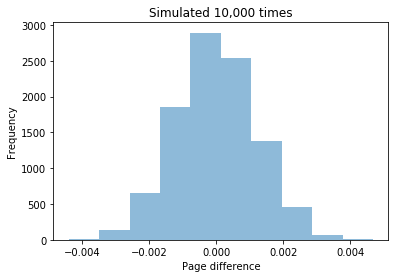

In [202]:
# plot distribution
plt.hist(p_diffs, alpha=.5);

plt.title('Simulated 10,000 times')
plt.xlabel('Page difference')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [203]:
# Compute observed difference in completion rates
obs_diff = prop_trea_conv - prop_cont_conv

# Display observed difference in completion rates
obs_diff

-0.0015782389853555567

In [204]:
# convert to numpy array
p_diffs = np.array(p_diffs)

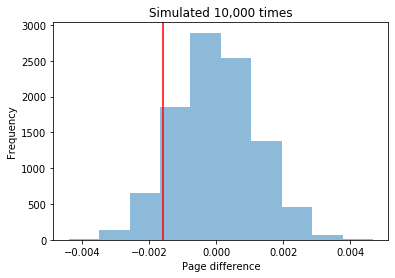

In [205]:
# plot distribution
plt.hist(p_diffs, alpha=.5);

# plot line for observed statistic
plt.axvline(x=obs_diff, color='red');
plt.title('Simulated 10,000 times')
plt.xlabel('Page difference')
plt.ylabel('Frequency');

In [155]:
# compute p value
(obs_diff < p_diffs).mean()

0.9052

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

`In the previous part, the p-value was calculated and since it is greater than 0.5 (p-value = 0.9052), this means that it is a fail to reject the null hypothesis.`

`This indicates that the old page is better or equal to the new page.`

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [163]:
# import statsmodels
import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"')['converted'].count()
n_new = df2.query('landing_page == "new_page"')['converted'].count()

# confirm changes
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [164]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')

#compute z_score and p_value
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

`Based on the result, we fail to reject the null hypothesis.`

`So, it agree with the findings in parts j and k.`

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

`In this case (Binary), I will use Logistic Regression. Because in this type, I have one correct out of two results.`

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [177]:
#Create a column for the intercept
df2['intercept'] = 1

#Create a dummy variable column - treatment(ab_page)
df2[['control','ab_page']] = pd.get_dummies(df2['group'])

# confirm changes
df2.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [206]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [207]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        03:52:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

`The p-value associated with ab_page is 0.190. `

`The null and alternative hypotheses here are different from those in Part II.`

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

`These additional factors are used to identify outliers values as well as to making the results of the hypotheses reliable.`

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [241]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [242]:
# view first 5 rows of the Dataset
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1


In [243]:
# Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

# confirm changes
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1,0,1,0


In [244]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = log_mod.fit()

# summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Jul 2020   Pseudo R-squ.:               1.521e-05
Time:                        04:15:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

`There is no significant impact.`

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [245]:
df_new['CA_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']

# confirm changes
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1,0,1,0,0,1


In [246]:
# Fit Your Linear Model And Obtain the Results
log_mod = sm.Logit(df_new['converted'], df_new[['intercept' , 'CA', 'UK', 'ab_page', 'CA_page', 'UK_page']])
results = log_mod.fit()

#summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        04:19:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

`Based on the result, we fail to reject the null hypothesis.`

`Because, p-value is still above 0.5.`